## Mushroom Prediction

### The Dataset

This dataset includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms per species). Each mushroom is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended (the latter class was combined with the poisonous class). Of the 20 variables, 17 are nominal and 3 are metrical.



#### Attribute Information:

One binary class divided in edible=e and poisonous=p (with the latter one also containing mushrooms of unknown edibility).
Twenty remaining variables (n: nominal, m: metrical)

cap-diameter (m): float number in cm
cap-shape (n): bell=b, conical=c, convex=x, flat=f,
sunken=s, spherical=p, others=o
cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s,
shiny=h, leathery=l, silky=k, sticky=t,
wrinkled=w, fleshy=e
cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p,
purple=u, red=e, white=w, yellow=y, blue=l,
orange=o, black=k
does-bruise-bleed (n): bruises-or-bleeding=t,no=f
gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,
sinuate=s, pores=p, none=f, unknown=?
gill-spacing (n): close=c, distant=d, none=f
gill-color (n): see cap-color + none=f
stem-height (m): float number in cm

### Project Aims


To predict if a mushroom is either poisonous or not with only the above mentioned variables

### EDA

In [43]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns

from category_encoders import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pickle

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


In [2]:
#import dataset
dataset = pd.read_csv('../raw_data/secondary_data.csv', sep=";", low_memory=False)

In [3]:
df = dataset.copy()

In [4]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [5]:
#profile = ProfileReport(df, title="Pandas Profilling Report", html={"style":{"full_width": True}})
#profile

### Insights:
- There are only 3 columns with numeric values, 2 with boolean and 16 with categorical.
- There are a LOT of missing data, some columns have more than 80% of missing values.
- All of the numeric columns have strong correlation with each other.
- There are no missing data in the boolean and numerical columns.

I need to drop some columns. I have chosen to drop columns that have more than 40% of missing data. 

I chose to drop 6 columns

In [6]:
drop_columns = ['gill-spacing', 'stem-root', 
                'stem-surface', 'veil-type', 
                'veil-color', 'spore-print-color']
df.drop(columns=drop_columns, inplace=True)

turning class into binary

In [9]:
gender = {'p': 1,'e': 0}

df['class'] = [gender[item] for item in df['class']]

In [11]:
df['class'].value_counts()

1    33888
0    27181
Name: class, dtype: int64

#### Splitting the data

In [12]:
X = df.drop(columns='class')
y = df['class']

In [13]:
X = OrdinalEncoder().fit_transform(X)
X.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,15.26,1,1,1,1,1,1,16.95,17.09,1,1,1,1,1
1,16.60,1,1,1,1,1,1,17.99,18.19,1,1,1,1,2
2,14.07,1,1,1,1,1,1,17.80,17.74,1,1,1,1,1
3,14.17,2,2,2,1,1,1,15.77,15.98,1,1,2,1,1
4,14.64,1,2,1,1,1,1,16.53,17.20,1,1,2,1,1


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Baseline Prediction 

In [15]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.5536


#### Random Forest Model

In [19]:
params = {
    "n_estimators": [1000],
    "max_depth": [30],
    "criterion": ["gini"]
}

In [20]:
model_random_forest = GridSearchCV(
    RandomForestClassifier(random_state=12),
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [21]:
model_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....criterion=gini, max_depth=30, n_estimators=1000; total time= 1.4min
[CV] END ....criterion=gini, max_depth=30, n_estimators=1000; total time= 1.4min
[CV] END ....criterion=gini, max_depth=30, n_estimators=1000; total time= 1.5min
[CV] END ....criterion=gini, max_depth=30, n_estimators=1000; total time= 1.5min
[CV] END ....criterion=gini, max_depth=30, n_estimators=1000; total time=  38.6s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [30],
                         'n_estimators': [1000]},
             verbose=2)

In [22]:
#with open ("model_random_forest_mushrooms.pkl", "wb") as m:
    #pickle.dump(model_random_forest, m)

#### Save and Load model as rf_model

In [23]:
with open("model_random_forest_mushrooms.pkl", "rb") as input_file: 
    rf_model = pickle.load(input_file)

In [24]:
rf_model.best_estimator_

RandomForestClassifier(max_depth=30, n_estimators=1000, random_state=12)

In [25]:
cv_results = pd.DataFrame(rf_model.cv_results_)
cv_results.sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,74.81723,18.850345,2.452944,0.52693,gini,30,1000,"{'criterion': 'gini', 'max_depth': 30, 'n_esti...",0.999795,0.999693,0.999693,0.999693,0.999693,0.999713,0.000041,1


In [26]:
# Get feature names from training data
features = X_train.columns
# Extract importances from model
importances = rf_model.best_estimator_.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features)
# Plot 10 most important features
feat_imp.sort_values(ascending=False).head(10)

stem-width         0.131240
cap-surface        0.129728
gill-attachment    0.111682
stem-height        0.091989
gill-color         0.086448
stem-color         0.086102
cap-diameter       0.082104
cap-color          0.057896
cap-shape          0.055819
ring-type          0.049047
dtype: float64

In [27]:
acc_train =rf_model.score(X_train, y_train)
acc_test = rf_model.score(X_test, y_test)

In [28]:
print('best accuracy score is:', round(acc_test*100,2),'%')

best accuracy score is: 99.98 %


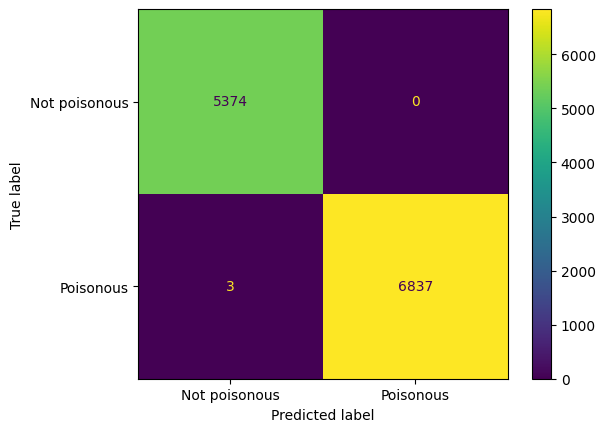

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, display_labels=["Not poisonous", "Poisonous"]);

we have a slight problem. Although our model is very sucessful in predicting the correct class, it has missed 3 poisonous mushrooms which isn't acceptable for our model.

In [31]:
probabilities = rf_model.predict_proba(X_train)
probabilities_df = pd.DataFrame(probabilities)
probabilities_df

,0,1
0,0.897,0.103
1,0.000,1.000
2,0.002,0.998
3,0.001,0.999
4,1.000,0.000
...,...,...
48850,0.001,0.999
48851,0.000,1.000
48852,0.000,1.000
48853,0.004,0.996


#### Investigating roc curve

In [58]:
fpr, tpr, threshold = roc_curve(y_train, probabilities[:,1])

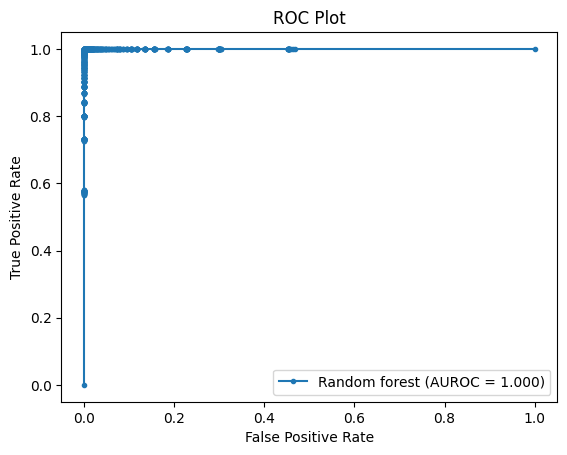

In [59]:
# AUC denotes the area under the ROC curve.
auc = roc_auc_score(y_train, probabilities[:,1])

plt.plot(fpr, tpr, marker=".", label="Random forest (AUROC = %0.3f)" % auc)

# Title
plt.title("ROC Plot")
# Axis labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# Show legend
plt.legend()
# Show plot
plt.show()

In [60]:
roc_df = pd.DataFrame({"fpr":fpr,"tpr":tpr,"threshold":threshold})
roc_df

,fpr,tpr,threshold
0,0.000000,0.000000,2.000000
1,0.000000,0.564848,1.000000
2,0.000000,0.565957,0.999995
3,0.000000,0.567103,0.999991
4,0.000000,0.567768,0.999988
...,...,...,...
629,0.455588,1.000000,0.000037
630,0.459715,1.000000,0.000016
631,0.463429,1.000000,0.000007
632,0.467602,1.000000,0.000007


In [61]:
roc_df[roc_df["tpr"] == 1].nlargest(1, "threshold")

,fpr,tpr,threshold
346,0.0,1.0,0.715
